Mengimpor Library untuk Fuzzy

In [ ]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 3.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=f9e9454d92ec91966504afb481b7727806ab373664e7cc0cb51a12a593cb29c4
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

Fuzzyfikasi

Class untuk Domain

In [ ]:
class domain():
    def __init__(self, lower_bound, upper_bound, fineness = 1) -> None:
        self.label = ""
        self.universe = np.linspace(lower_bound, upper_bound, fineness*1000)
        self.probs = dict()

    def view(self):
        fig, ax = plt.subplots()
        for key, items in self.probs.items():
            ax.plot(self.universe, items)
        plt.show()


Menentukan variabel dan semesta pembicaraan

In [ ]:
population_size =ctrl.Antecedent(np.linspace(0, 1000), 'Population Size')
generation = ctrl.Antecedent(np.linspace(0, 1000), 'Generation')
prob_crossover = ctrl.Consequent(np.linspace(0.6, 0.9), 'Prob Crossover')
prob_mutasi = ctrl.Consequent(np.linspace(0, 0.250), 'Prob Mutasi')

In [ ]:
# population_size = domain(0, 1000)
# generation = domain(0, 1000)
# prob_crossover = domain(0.6, 0.9)
# prob_mutasi = domain(0, 0.25)

Fungsi keanggotaan jumlah populasi



In [ ]:
population_size['small'] = fuzz.zmf(population_size.universe, 50, 250)
population_size['medium'] = fuzz.gaussmf(population_size.universe, mean=275, sigma=80)
population_size['large'] = fuzz.smf(population_size.universe, 350, 500)

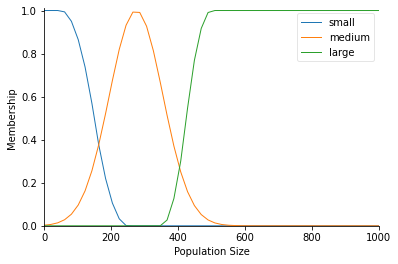

In [ ]:
population_size.view()

Fungsi keanggotaan jumlah generasi

In [ ]:
generation['short'] = fuzz.zmf(generation.universe, 50, 200)
generation['medium'] = fuzz.gaussmf(generation.universe, mean=275, sigma=80)
generation['long'] = fuzz.smf(generation.universe, 350, 500)

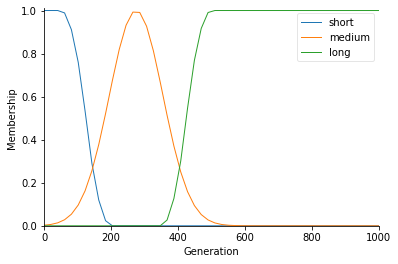

In [ ]:
generation.view()

Fungsi keanggotaan probabilitas crossover

In [ ]:
prob_crossover['small'] = fuzz.zmf(prob_crossover.universe, 0.625, 0.7)
prob_crossover['medium'] = fuzz.trapmf(prob_crossover.universe, [0.63, 0.7, 0.72, 0.78])
prob_crossover['large'] = fuzz.trapmf(prob_crossover.universe, [0.72, 0.78, 0.8, 0.87])
prob_crossover['very_large'] = fuzz.smf(prob_crossover.universe, 0.8, 0.875)

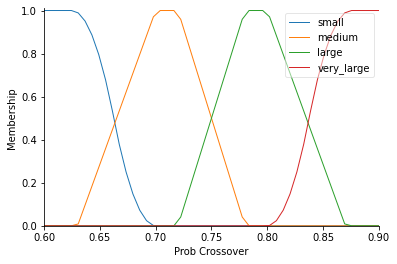

In [ ]:
prob_crossover.view()

Fungsi keanggotaan probabilitas mutasi

In [ ]:
prob_mutasi['very_small'] = fuzz.zmf(prob_mutasi.universe, 0.025, 0.1)
prob_mutasi['small'] = fuzz.trapmf(prob_mutasi.universe, [0.047, 0.083, 0.1, 0.14])
prob_mutasi['medium'] = fuzz.trapmf(prob_mutasi.universe, [0.1, 0.14, 0.167, 0.2])
prob_mutasi['large'] = fuzz.smf(prob_mutasi.universe, 0.15, 0.225)

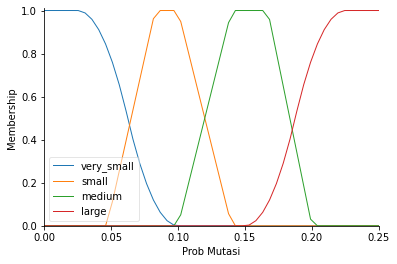

In [ ]:
prob_mutasi.view()

In [ ]:
rule1 = ctrl.Rule(population_size['small'] and generation['short'], prob_crossover['medium'] and prob_mutasi['large'])
rule2 = ctrl.Rule(population_size['medium'] and generation['short'], prob_crossover['small'] and prob_mutasi['medium'])
rule3 = ctrl.Rule(population_size['large'] and generation['short'], prob_crossover['small'] and prob_mutasi['small'])
rule4 = ctrl.Rule(population_size['small'] and generation['medium'], prob_crossover['large'] and prob_mutasi['medium'])
rule5 = ctrl.Rule(population_size['medium'] and generation['medium'], prob_crossover['large'] and prob_mutasi['small'])
rule6 = ctrl.Rule(population_size['large'] and generation['medium'], prob_crossover['medium'] and prob_mutasi['very_small'])
rule7 = ctrl.Rule(population_size['small'] and generation['long'], prob_crossover['very_large'] and prob_mutasi['small'])
rule8 = ctrl.Rule(population_size['medium'] and generation['long'], prob_crossover['very_large'] and prob_mutasi['very_small'])
rule9 = ctrl.Rule(population_size['large'] and generation['long'], prob_crossover['large'] and prob_mutasi['very_small'])

In [ ]:
simulation = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

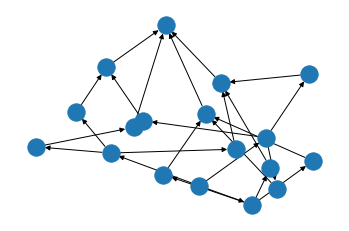

In [ ]:
simulation.view()

In [ ]:
input_simulation = ctrl.ControlSystemSimulation(simulation)